# Function Approximation, using Feed-Forward Neural Networks

### The Libraries

In [1]:
import matplotlib.pyplot as plt
import torch 
import numpy as np
from sklearn.metrics import mean_squared_error
from training import *
from feed_forward import *
from functions import *



## ----------------------------------------------------------------------------------------------------------

### Function f0 

In [2]:
%%latex
\(f_0(x):=x^2\), where \(x\in [-10, 10]\)

<IPython.core.display.Latex object>

This function f0 is just a toy example to see how functions are approximated. We use a NN with 1 layer with 4 neurons.

#### Fitting the model with all of our data for f0 

In [1]:
loss_array_f0,model_0_f0= forward_model_training_0_1_2_3(100, 0, 10**(-1), NN0_0(), 10**(-6))

NameError: name 'forward_model_training_0_1_2_3' is not defined

#### Loading the data

In [1]:
Input_train_0,f0_train, Input_test_0, f0_test,  Input_data_0, f0_data =data_splitter(0) 

NameError: name 'data_splitter' is not defined

#### Loss vs epochs

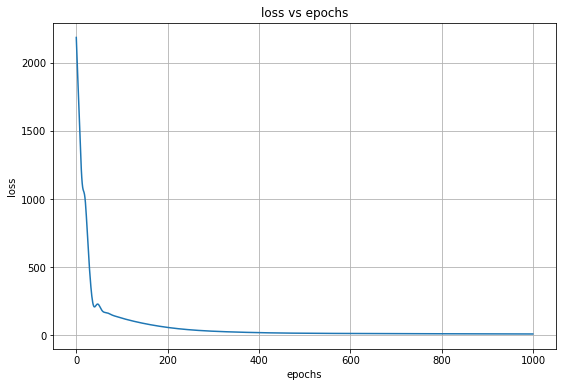

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_array_f0)), loss_array_f0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f0_1')
plt.show()


#### Approximation vs true function 

##### Getting the approximation of f0

In [ ]:
with torch.no_grad():
    f0_approx =[]
    for i in Input_data_0:

        f0_approx.append(model_0_f0.forward(i).item())


##### Ploting the result

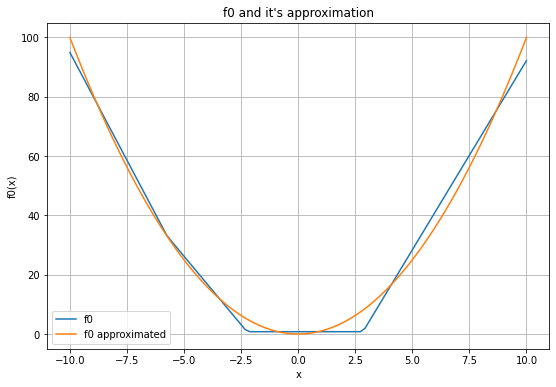

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(Input_data_0, f0_approx, label='f0')
plt.plot(Input_data_0, f0_data.reshape(len(Input_data_0), -1), label='f0 approximated')
plt.xlabel('x')
plt.ylabel('f0(x)')
plt.title('f0 and it\'s approximation')
plt.legend()
plt.grid()
plt.savefig('./figures/f0_approximation_1')
plt.show()


In [2]:
MSE_0=min(loss_array_f0)
print(MSE_0)

NameError: name 'loss_array_f0' is not defined

## ----------------------------------------------------------------------------------------------------------

## F1 approximation

In this section our goal is to compare Deep and Shallow architectures for several architectures.

In [ ]:
%%latex
\(f_1(x):=xx-yy\), where \((x,y)\in \Re^2\)

<IPython.core.display.Latex object>

### Deep architectures

We have 4 architectures. With respectively, 4, 5, 7 and 10 hidden layer. All the layers contains 10 neurons

We define a commun learning rate (lr), commun epochs, and the same regularization alpha

In [ ]:
lr=10**(-1)
epochs = 1000
alpha=10**(-2)

##### Training DA1, DA2, DA3 and DA4

In [ ]:
loss_f1_F_D_1_ReLu,model_f1_DA1 = forward_model_training_0_1_2_3(epochs, 1, lr, NN1_F_D_1_ReLu(),alpha)
loss_f1_F_D_2_ReLu, model_f1_DA2= forward_model_training_0_1_2_3(epochs, 1, lr, NN1_F_D_1_ReLu(),alpha)
loss_f1_F_D_3_ReLu,  model_f1_DA3= forward_model_training_0_1_2_3(epochs, 1, lr, NN1_F_D_1_ReLu(),alpha)
loss_f1_F_D_4_ReLu,model_f1_F_D_4_ReLu = forward_model_training_0_1_2_3(epochs, 1, lr, NN1_F_D_1_ReLu(),alpha)

100%|██████████| 1000/1000 [00:00<00:00, 1063.54it/s]


##### Visualizing the training

Loss vs epochs

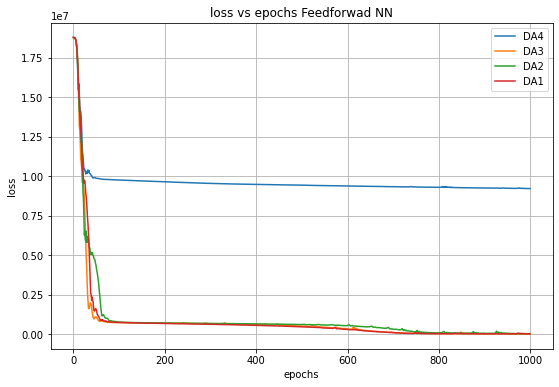

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_4_ReLu)), loss_f1_F_D_4_ReLu, label='DA4')
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_3_ReLu, label='DA3')
plt.plot(range(len(loss_f1_F_D_2_ReLu)), loss_f1_F_D_2_ReLu, label='DA2')
plt.plot(range(len(loss_f1_F_D_1_ReLu)), loss_f1_F_D_1_ReLu, label='DA1')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_DA123')
plt.show()

In [ ]:
loss_f1_F_D_1_ReLu[0]/loss_f1_F_D_1_ReLu[-1]


675.5742438416623

Using the log-scale to visualize better


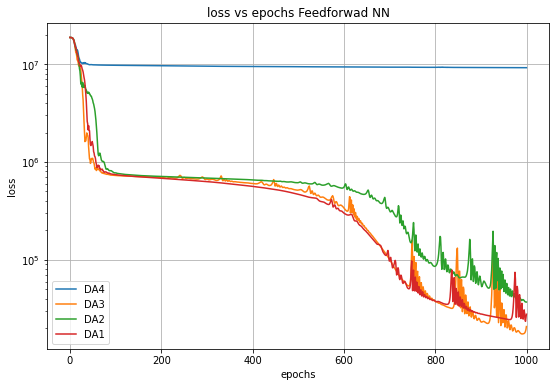

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_4_ReLu)), loss_f1_F_D_4_ReLu, label='DA4')
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_3_ReLu, label='DA3')
plt.plot(range(len(loss_f1_F_D_2_ReLu)), loss_f1_F_D_2_ReLu, label='DA2')
plt.plot(range(len(loss_f1_F_D_1_ReLu)), loss_f1_F_D_1_ReLu, label='DA1')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.yscale('log')
plt.savefig('./figures/loss_vs_epochs_f1_F_DA1234_log')
plt.show()

Best MSE 

In [ ]:
mini_D=min(min(loss_f1_F_D_1_ReLu), min(loss_f1_F_D_1_ReLu),min(loss_f1_F_D_1_ReLu), min(loss_f1_F_D_1_ReLu))
L=[loss_f1_F_D_1_ReLu, loss_f1_F_D_1_ReLu,loss_f1_F_D_1_ReLu, loss_f1_F_D_1_ReLu]
for i in range(4):
    if min(L[i])== mini :
        print(i+1, mini)
        break 

We can see that the best performance during training is that of DA2


## ----------------------------------------------------------------------------------------------------------

### Shallow mode using ReLu

#### Single layer shallow network

First let us examin the performance of a single layer shallow model.

We choose architectures SA01, SA02, SA03 and SA04. With single layer and having repectively 40, 50, 70 and 100 layers

##### Trainining SA11, SA12, SA13 and SA14

In [ ]:
loss_f1_F_S_11_ReLu, model_f1_F_S_11_ReLu = forward_model_training_0_1_2_3(epochs, 1, lr, NN0_F_S(2,40),alpha)
loss_f1_F_S_12_ReLu, model_f1_F_S_12_ReLu = forward_model_training_0_1_2_3(epochs, 1, lr, NN0_F_S(2,50),alpha)
loss_f1_F_S_13_ReLu, model_f1_F_S_13_ReLu = forward_model_training_0_1_2_3(epochs, 1, lr, NN0_F_S(2,70),alpha)
loss_f1_F_S_14_ReLu, model_f1_F_S_14_ReLu = forward_model_training_0_1_2_3(epochs, 1, lr, NN0_F_S(2,100),alpha)

100%|██████████| 1000/1000 [00:00<00:00, 1513.75it/s]


##### Visualizing the traing performances for a single layer NN

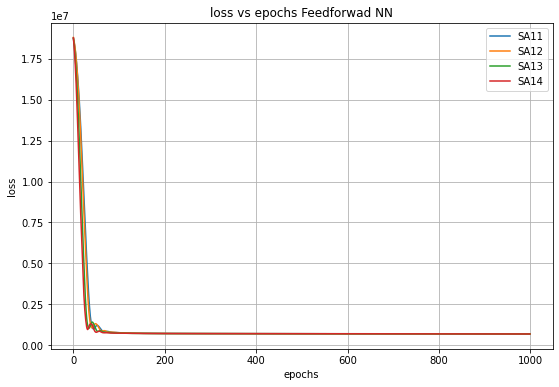

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_11_ReLu)) , loss_f1_F_S_11_ReLu , label='SA11')
plt.plot(range(len(loss_f1_F_S_12_ReLu)), loss_f1_F_S_12_ReLu , label='SA12')
plt.plot(range(len(loss_f1_F_S_13_ReLu)) , loss_f1_F_S_13_ReLu , label='SA13')
plt.plot(range(len(loss_f1_F_S_14_ReLu)), loss_f1_F_S_14_ReLu, label='SA14')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_SA0')
plt.show()

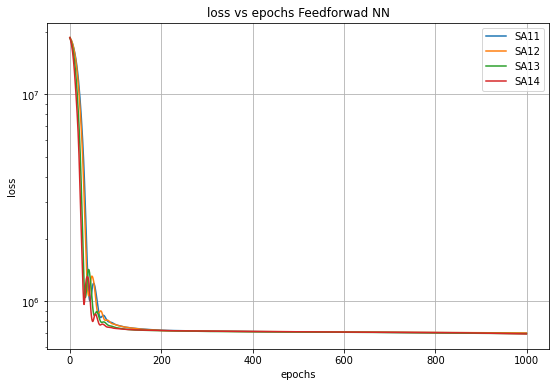

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_11_ReLu)) , loss_f1_F_S_11_ReLu , label='SA11')
plt.plot(range(len(loss_f1_F_S_12_ReLu)), loss_f1_F_S_12_ReLu , label='SA12')
plt.plot(range(len(loss_f1_F_S_13_ReLu)) , loss_f1_F_S_13_ReLu , label='SA13')
plt.plot(range(len(loss_f1_F_S_14_ReLu)), loss_f1_F_S_14_ReLu, label='SA14')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.yscale('log')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_SA0')
plt.show()

DEtecting the minimum

In [ ]:
mini=min(min(loss_f1_F_S_11_ReLu), min(loss_f1_F_S_12_ReLu),min(loss_f1_F_S_13_ReLu), min(loss_f1_F_S_14_ReLu))
L=[loss_f1_F_S_11_ReLu, loss_f1_F_S_12_ReLu,loss_f1_F_S_13_ReLu, loss_f1_F_S_14_ReLu]
for i in range(4):
    if min(L[i])== mini :
        print(i+1, mini)
        break 

4 695403.625


The best performance during the training is that of SA14 (100 neurons )

#### Two layers
shallow network 

We choose an architecture where we have 2 hidden layer. Each having 20 neurons. And, we use the ReLu activation function for all the layer.

##### Training training the 4 architechtures

In [ ]:
loss_f1_F_S_21_ReLu,model_f1_F_S_21_ReLu = forward_model_training_0_1_2_3(epochs, 1, lr, NN1_F_S(2,20,20),alpha)
loss_f1_F_S_22_ReLu,model_f1_F_S_22_ReLu = forward_model_training_0_1_2_3(epochs, 1, lr, NN1_F_S(2,25,25),alpha)
loss_f1_F_S_23_ReLu, model_f1_F_S_23_ReLu = forward_model_training_0_1_2_3(epochs, 1, lr, NN1_F_S(2,35,35),alpha)
loss_f1_F_S_24_ReLu, model_f1_F_S_24_ReLu = forward_model_training_0_1_2_3(epochs, 1, lr, NN1_F_S(2,50,50),alpha)

100%|██████████| 1000/1000 [00:01<00:00, 945.74it/s]


##### Visualizing the training

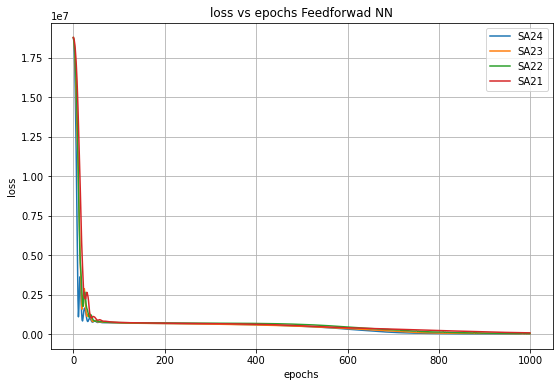

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24')
plt.plot(range(len(loss_f1_F_S_23_ReLu)), loss_f1_F_S_23_ReLu, label='SA23')
plt.plot(range(len(loss_f1_F_S_22_ReLu)), loss_f1_F_S_22_ReLu, label='SA22')
plt.plot(range(len(loss_f1_F_S_21_ReLu)), loss_f1_F_S_21_ReLu, label='SA21')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_SA')
plt.show()

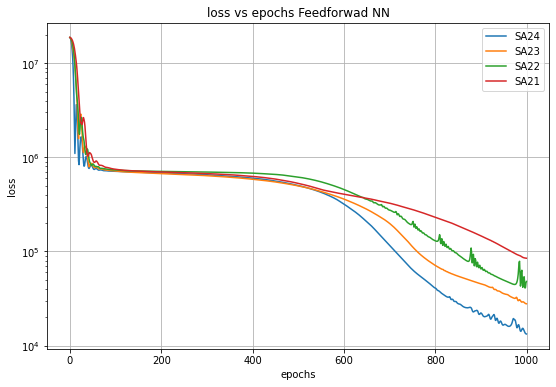

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24')
plt.plot(range(len(loss_f1_F_S_23_ReLu)), loss_f1_F_S_23_ReLu, label='SA23')
plt.plot(range(len(loss_f1_F_S_22_ReLu)), loss_f1_F_S_22_ReLu, label='SA22')
plt.plot(range(len(loss_f1_F_S_21_ReLu)), loss_f1_F_S_21_ReLu, label='SA21')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.yscale('log')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_SA')
plt.show()

Detecting the minimimum

In [ ]:
mini_S=min(min(loss_f1_F_S_21_ReLu), min(loss_f1_F_S_22_ReLu),min(loss_f1_F_S_23_ReLu), min(loss_f1_F_S_24_ReLu))
L=[loss_f1_F_S_21_ReLu, loss_f1_F_S_22_ReLu,loss_f1_F_S_23_ReLu, loss_f1_F_S_24_ReLu]
for i in range(4):
    if min(L[i])== mini :
        print(i+1, mini)
        break 

4 13272.494140625


The best performance seems to that of SA24 (2 layers and 50 neurons each )

#### Comparing the single layer SA04 and the two-layer SA4

loss vs epochs

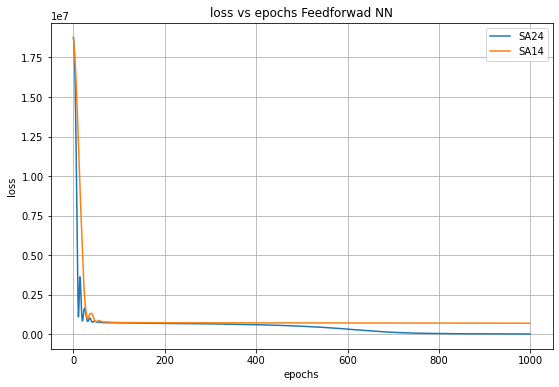

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24')
plt.plot(range(len(loss_f1_F_S_14_ReLu)), loss_f1_F_S_14_ReLu, label='SA14')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/SA1_vs_SA2')
plt.show()

Detecting the minimum

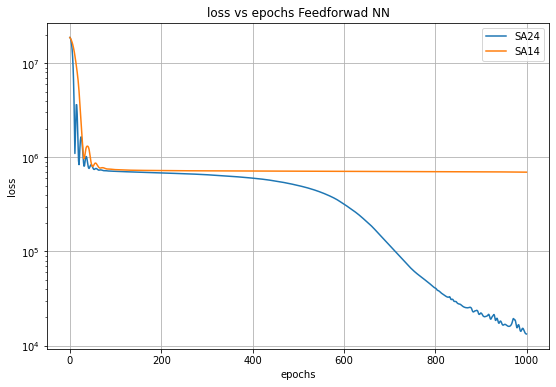

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24')
plt.plot(range(len(loss_f1_F_S_14_ReLu)), loss_f1_F_S_14_ReLu, label='SA14')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.yscale('log')
plt.title('loss vs epochs Feedforwad NN')

plt.grid()
plt.savefig('./figures/SA1_vs_SA2')
plt.show()

In [ ]:
print('MSE SA24 = ', min(loss_f1_F_S_24_ReLu))
print('MSE SA14 = ', min(loss_f1_F_S_14_ReLu))

MSE SA24 =  13272.494140625
MSE SA14 =  695403.625


We can learly see that SA24 is far better that SA14

## ----------------------------------------------------------------------------------------------------------

### Comparing the performances during training for shallow and Deep approaches

We only plot the best S2A and DA

#### Loss vs epochs

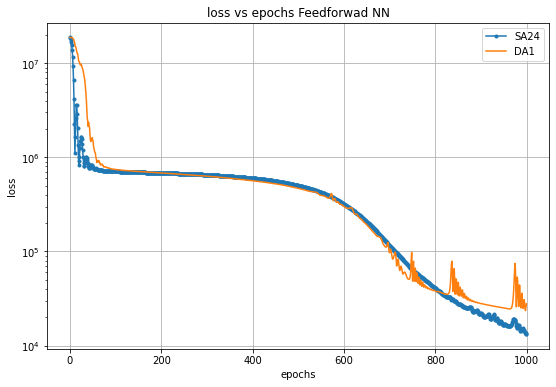

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_24_ReLu)), loss_f1_F_S_24_ReLu, label='SA24', marker='.')
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_1_ReLu, label='DA1')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.yscale('log')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_DAs_VS_SAs')
plt.show()

Lowest MSE

In [ ]:
print(f'Deep = {mini_D} ')
print(f'Shallow = {mini_S} ')

Deep = 23496.869140625 
Shallow = 13272.494140625 


The winner is shallow NNs ...

We proceed to the testing phase

### Generalization capacity

We start by loading f1's data

#### loading data

In [ ]:
Input_train_1,f1_train, Input_test_1, f1_test,  Input_data_1, f1_data =data_splitter(1) 

### Testing the best Deep architecture, DA3

We test the best Deep architechture. Which in our case is DA3 (7 layers). 

First, we plot the prediction and target function for test batch with respect to x and y

##### 2D plot 

Get the prediction with respect to x

In [ ]:
with torch.no_grad():
    f1_approx_2D =[]
    for i in Input_test_1:

        f1_approx_2D.append(model_f1_DA3.forward(i).item())
        

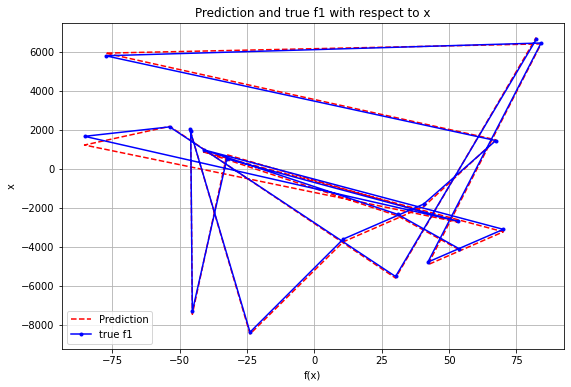

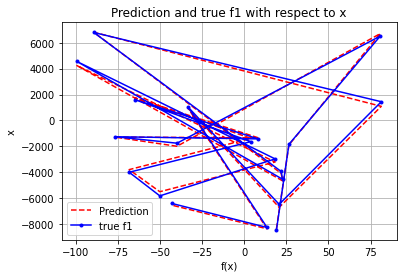

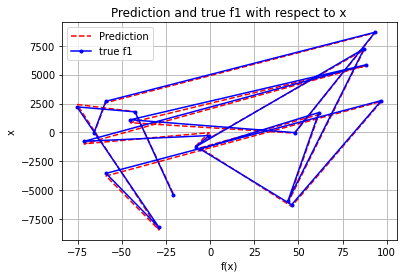

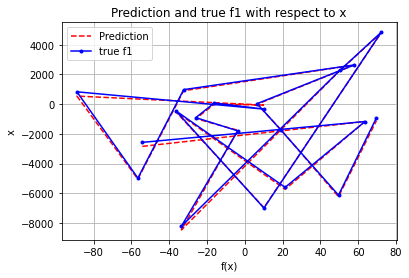

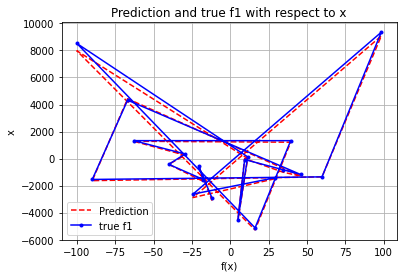

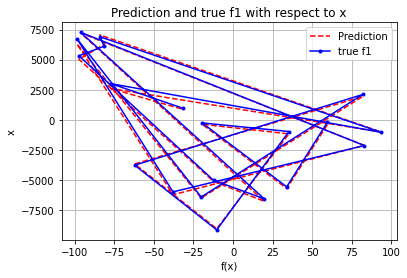

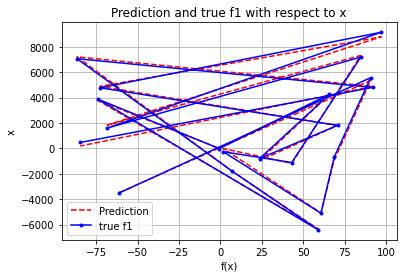

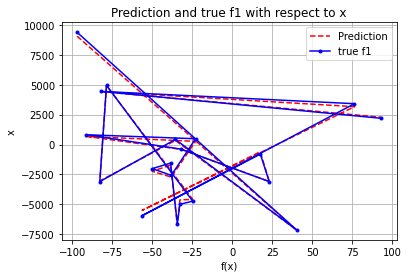

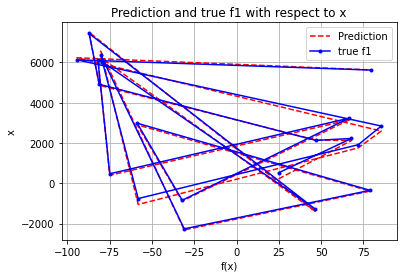

In [ ]:
plt.figure(figsize=[9,6])
for i in range(1,10):

    plt.plot(Input_test_1[(i-1)*20:i*20,0], f1_approx_2D[(i-1)*20:i*20], label='Prediction', ls=('dashed'), color='r')
    plt.plot(Input_test_1[(i-1)*20:i*20,0], f1_test[(i-1)*20:i*20], label='true f1', marker='.', color='b')

    plt.xlabel('f(x)')
    plt.ylabel('x')
    plt.title('Prediction and true f1 with respect to x')
    plt.legend()
    plt.grid()
    plt.show()

Get the prediction with respect to y

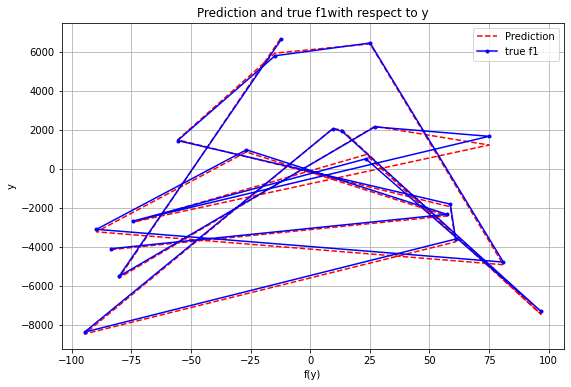

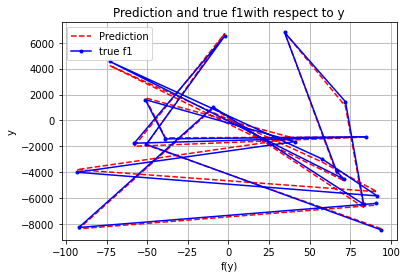

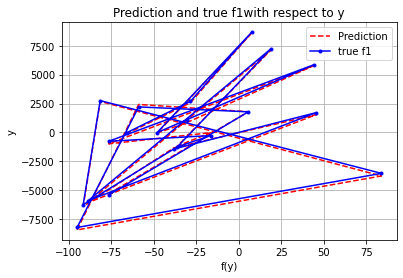

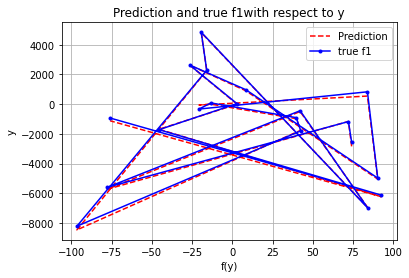

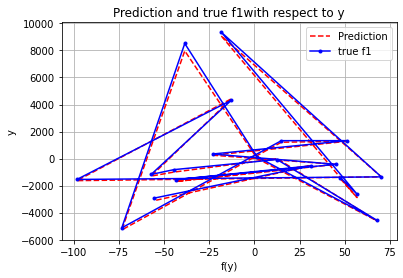

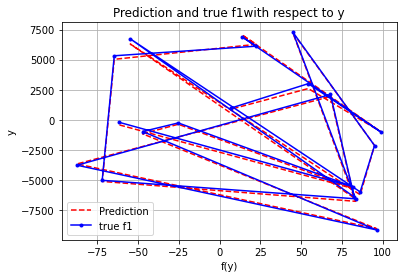

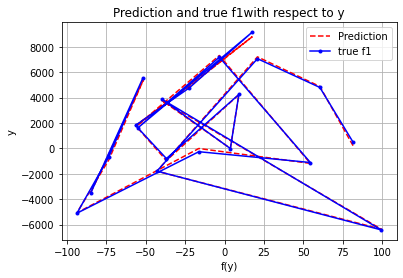

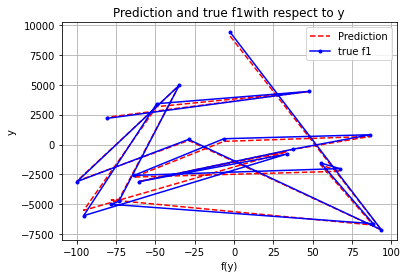

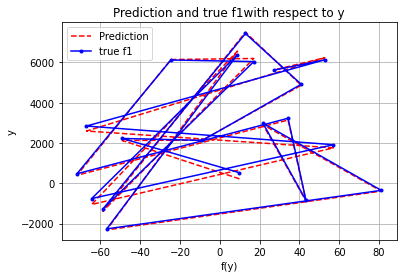

In [ ]:
plt.figure(figsize=[9,6])
for i in range(1,10):

    plt.plot(Input_test_1[(i-1)*20:i*20,1], f1_approx_2D[(i-1)*20:i*20], label='Prediction', ls=('dashed'), color='r')
    plt.plot(Input_test_1[(i-1)*20:i*20,1], f1_test[(i-1)*20:i*20], label='true f1', marker='.', color='b')

    plt.xlabel('f(y)')
    plt.ylabel('y')
    plt.title('Prediction and true f1with respect to y')
    plt.legend()
    plt.grid()
    plt.show()

##### 3D plot

In [ ]:
X,Y=np.meshgrid(Input_test_1[:,0].numpy(), Input_test_1[:,1].numpy())

In [ ]:
grid=torch.Tensor(np.c_[X.ravel(),Y.ravel()]) 

with torch.no_grad():
    
    f1_approx =model_f1_DA3.forward(grid)
    grid_f1_approx=f1_approx.view(X.shape).numpy() 

KeyboardInterrupt: 

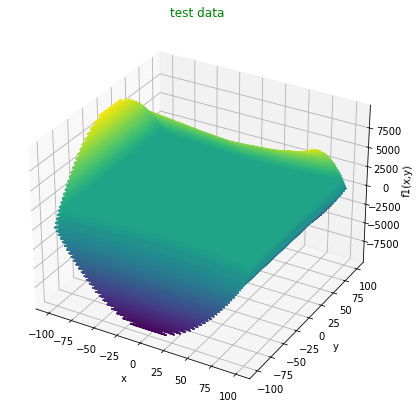

In [ ]:
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, f1(X, Y), 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('test data', color='g')
plt.savefig('figures/f1_test_F_DA3')
plt.show()

In [ ]:
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, grid_f1_approx, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('Accuracy over test data', color='g')
plt.show()

#### Total error (MSE)

In [ ]:
TE_D=mean_squared_error(np.array(f1_approx_2D), np.array(f1_test))
print(TE_D)

27056.06777080245


Testing several activation functions and their impact on overflow

### Testing the best Shallow architecture, SA23

##### 2D plot

Get prediction with repect to x

In [ ]:
with torch.no_grad():
    f1_approx_S_2D =[]
    for i in Input_test_1:
        f1_approx_S_2D.append(model_f1_F_S_23_ReLu.forward(i).item())
        

Visualizing the plot 

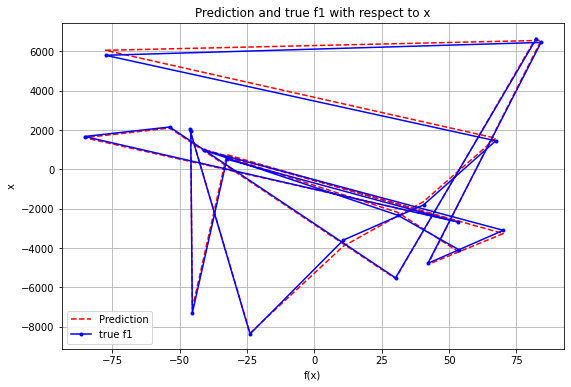

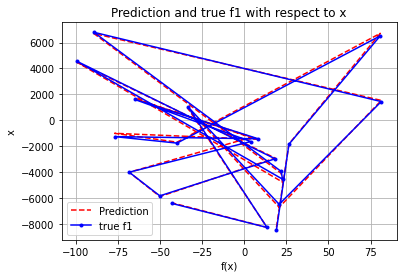

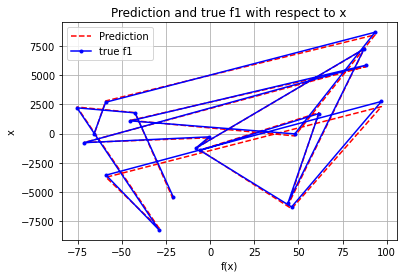

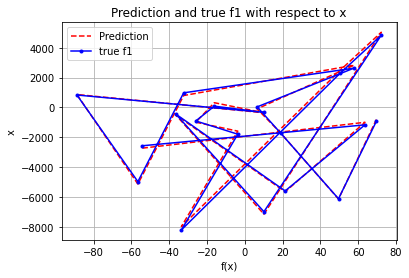

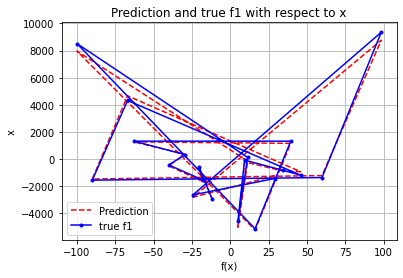

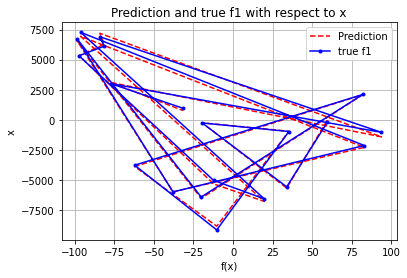

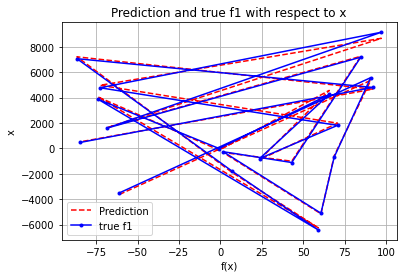

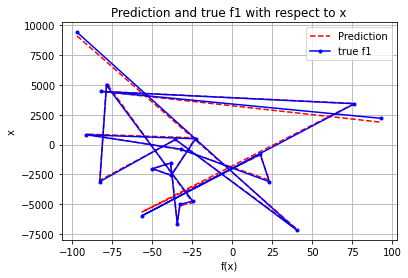

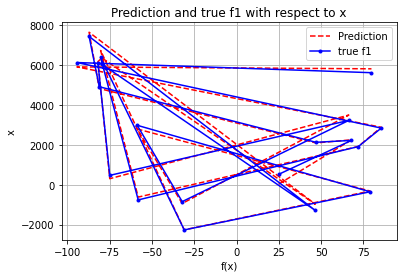

In [ ]:
plt.figure(figsize=[9,6])
for i in range(1,10):

    plt.plot(Input_test_1[(i-1)*20:i*20,0], f1_approx_S_2D[(i-1)*20:i*20], label='Prediction', ls=('dashed'), color='r')
    plt.plot(Input_test_1[(i-1)*20:i*20,0], f1_test[(i-1)*20:i*20], label='true f1', marker='.', color='b')

    plt.xlabel('f(x)')
    plt.ylabel('x')
    plt.title('Prediction and true f1 with respect to x')
    plt.legend()
    plt.grid()
    plt.show()

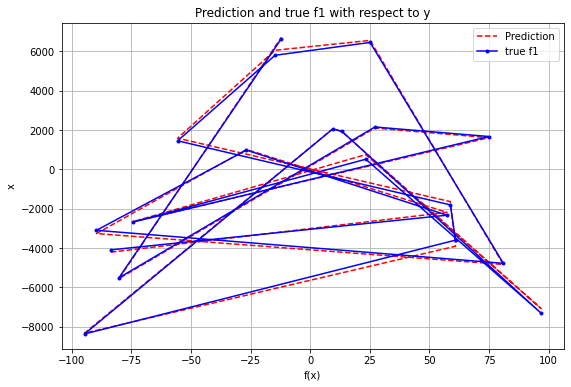

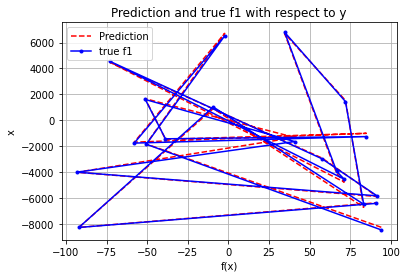

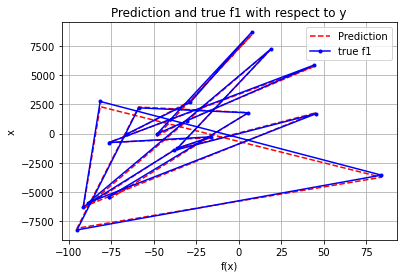

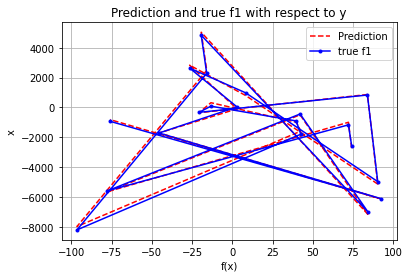

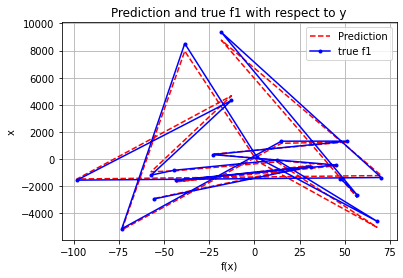

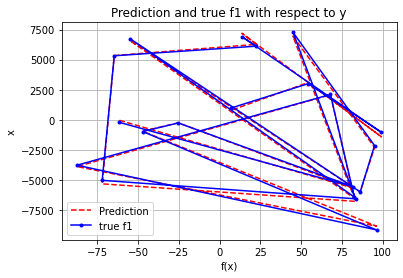

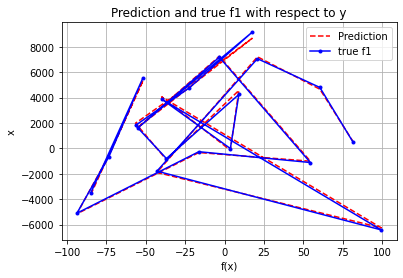

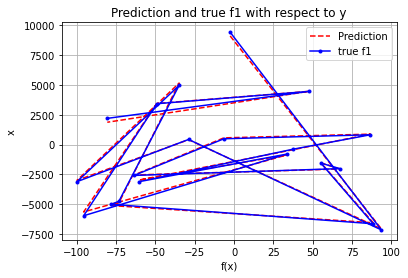

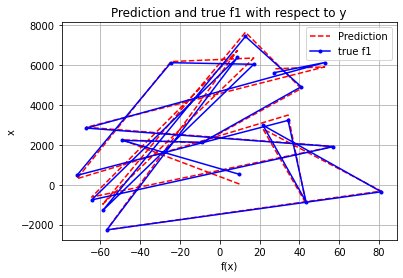

In [ ]:
plt.figure(figsize=[9,6])
for i in range(1,10):

    plt.plot(Input_test_1[(i-1)*20:i*20,1], f1_approx_S_2D[(i-1)*20:i*20], label='Prediction', ls=('dashed'), color='r')
    plt.plot(Input_test_1[(i-1)*20:i*20,1], f1_test[(i-1)*20:i*20], label='true f1', marker='.', color='b')

    plt.xlabel('f(x)')
    plt.ylabel('x')
    plt.title('Prediction and true f1 with respect to y')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
grid=torch.Tensor(np.c_[X.ravel(),Y.ravel()]) 

with torch.no_grad():
    
    f1_approx_S =model_f1_F_S_23_ReLu.forward(grid)
    grid_f1_approx_S=f1_approx_S.view(X.shape).numpy() 

In [ ]:
fig = plt.figure(figsize =[10,7])
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, grid_f1_approx_S, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f1(x,y)')
ax.set_title('Accuracy over test data', color='g')
plt.show()

KeyboardInterrupt: 

##### Total error (MSE)

In [ ]:
TE_S=mean_squared_error(np.array(f1_approx_S_2D), np.array(f1_test))
print(TE_S)

33012.65998320175


Total error for Shallow and Deep model

In [ ]:
print('TE_S', TE_S)
print('TE_D', TE_D)

TE_S 33012.65998320175
TE_D 27056.06777080245


We can see that the shallow model is overffited

### Inhancing the best model 

Our best approach appears to be a shallow architecture with 2 layers and a maximum of neurons. 

Next, we will increase the number of neuros in each layer. As well as adding more regularization to avoid overffiting.

And we will as well quantize the model's weight and activations to 8 bits. And make sure that the Acumulators do not exceed 19 bits

### The f1's Approximator

##### As previously stated. We choos to work with a shallow NN with two layers.

###### Adding regularization and neurons

100 neurons per layer

In [ ]:
loss_f1_F_ReLu, model_f1_F_ReLu = forward_model_training_0_1_2_3(1000, 1, lr, NN1_F_S(2,300,300), 10**(-1))

100%|██████████| 1000/1000 [00:10<00:00, 91.37it/s]


##### Loss vs epochs

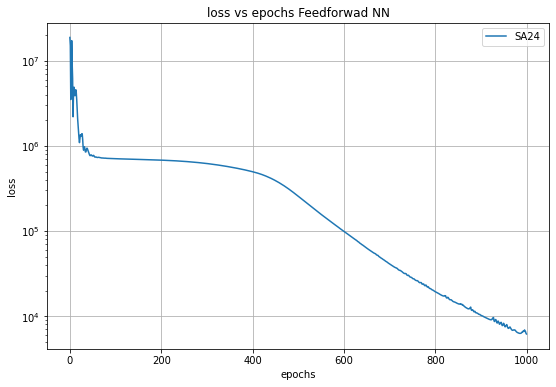

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_ReLu)), loss_f1_F_ReLu, label='SA24')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.yscale('log')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1')
plt.show()

Get the approcimation 

In [ ]:
with torch.no_grad():
    f1_approx_F =[]
    for i in Input_test_1:
        f1_approx_F.append(model_f1_F_ReLu.forward(i).item())

computing the accuracy

In [ ]:
TE_f1_F=mean_squared_error(np.array(f1_approx_F), np.array(f1_test))
print('TE_f1_F',TE_f1_F)
print('TE_S',TE_S)
print('TE_D',TE_D)

TE_f1_F 7165.962539551142
TE_S 33012.65998320175
TE_D 27056.06777080245


### Visualization of the final function 

### Quantizing the Feedforward NN

In [ ]:
loss_f1_F_ReLu_quantized, model_f1_F_ReLu = forward_model_training_0_1_2_3(1000, 1, lr, NN1_F_S_Quantized(2,300,300), 10**(-1))

NameError: name 'NN1_F_S_Quantized' is not defined

## Bonus

We can add the following function in order to see about the patterns.

In [ ]:
%%latex
\(f_5(x,y)=sin(x)+sin(x)\)